## Content: 
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter 
narrowing)

In [1]:
#import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures # for creating polynomial features

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# import naive_bayes from sklearn
from sklearn.naive_bayes import GaussianNB

# import SVC from sklearn
from sklearn.svm import SVC

import warnings # to filter out warnings
from sklearn.exceptions import FitFailedWarning # to filter out warnings

# Temporarily filter out the FitFailedWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)


In [2]:
#read data
df = pd.read_csv('heart.csv')

# exploring data

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#check columns and rows
df.shape

(303, 14)

In [5]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


we see that all data is numerical, and there no null value in the data set. But we will double check

In [6]:
#check for null values
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

<h4> we won't check for douplicates since no unique id is provided

In [7]:
#count how many people have heart attack
heart_attack = df[df['output'] == 1]
print("Number of people who have heart attack: ", len(heart_attack),"out of ", len(df), "people")

Number of people who have heart attack:  165 out of  303 people


More than half of the population is suffering from heart disease.

In [189]:
#find the percentage of male and female who had heart attack
#remember 1 in sex column means male and 2 means female
male_HA = df[(df['output'] == 1) & (df['sex'] == 1)]
percentofmale = round(100*len(male_HA)/len(heart_attack),2)
print(" Percentage of male who have heart attack: ", percentofmale,"%\n","and percentage of female is ", round(100*(len(heart_attack)-len(male_HA))/len(heart_attack),2),"%")

 Percentage of males who have heart attack:  56.36 %
 and percentage of females is  43.64 %


# visualizing the data.

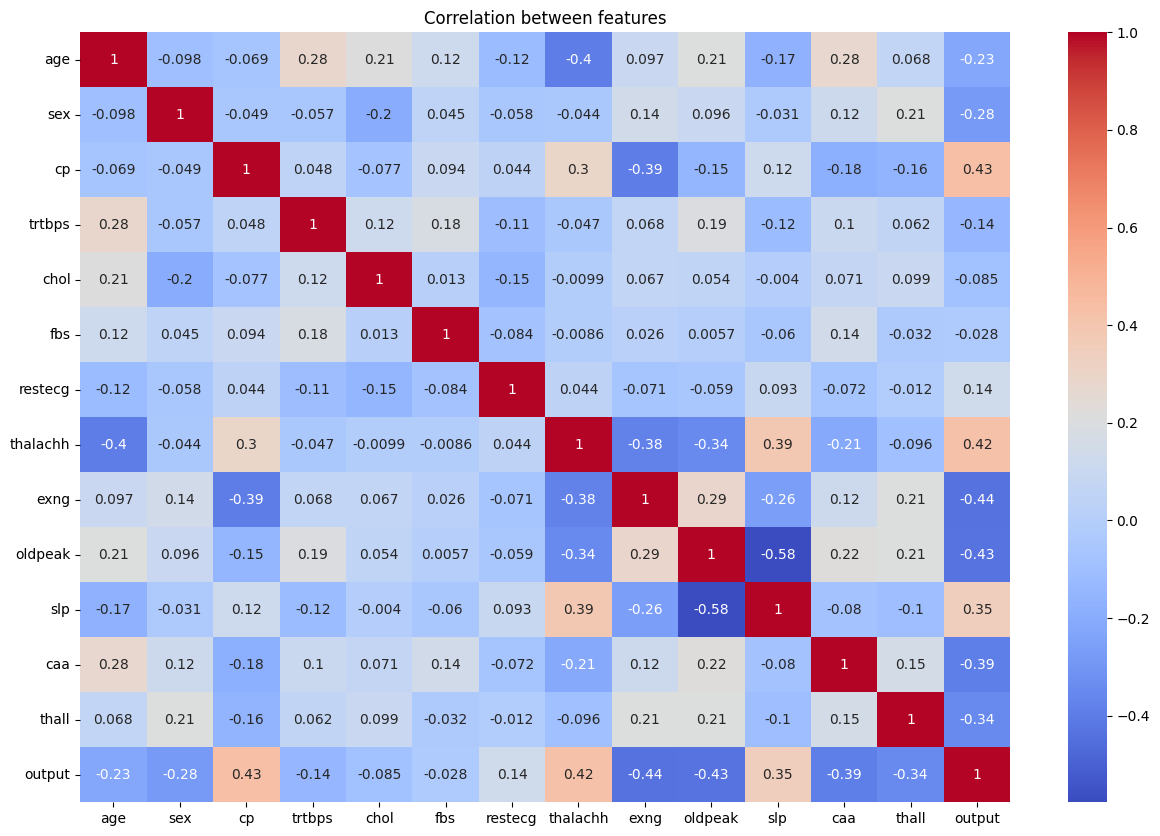

In [9]:
#graph the correlation between each feature
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

<h4> exercise induced agina (exng) has the highest correlation with heart attack (output), The correlation is negative (-0.44), which means that the more the exng, the less the chance of heart attack </h4>
<h4> then comes chest pain (cp) and old peak (oldpeak) with correlation of 0.43 and -0.43 respectively</h4>

Text(0.5, 1.0, 'Heart Attack Frequency for Ages')

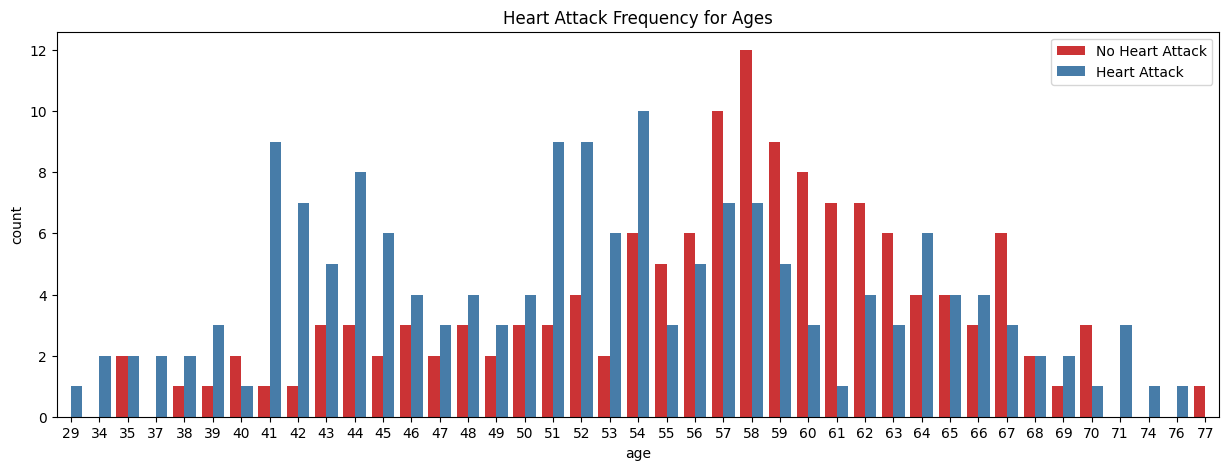

In [10]:
#graph age with output
plt.figure(figsize=(15,5))
sns.countplot(x='age',hue='output',data=df,palette='Set1')
plt.legend(['No Heart Attack','Heart Attack'])
plt.title('Heart Attack Frequency for Ages')


We could see that the majority of heart attacks occur in people older than 50 years.

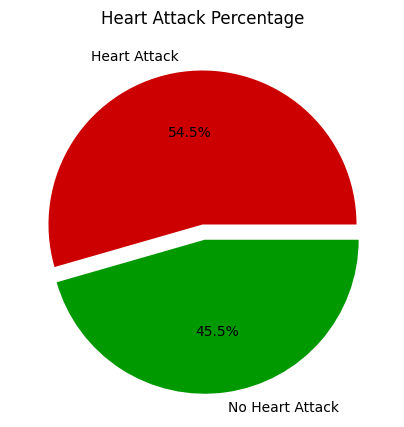

In [11]:
#use pie graph to show the percentage of people who have a heart attack and who don't
plt.figure(figsize=(5,5))
plt.pie(df['output'].value_counts(),labels=['Heart Attack','No Heart Attack'],autopct='%1.1f%%',explode=(0,0.1), colors=['#CC0000','#009900'])

plt.title('Heart Attack Percentage')
plt.show()

([<matplotlib.patches.Wedge at 0x18e84cce590>,
 [Text(-0.218449509639842, 1.078090817945368, 'Male'),
  Text(0.22043541427293087, -1.0878916435630535, 'Female')],
 [Text(-0.11915427798536835, 0.5880495370611099, '56.36%'),
  Text(0.12114018261845748, -0.597850362678795, '43.64%')])

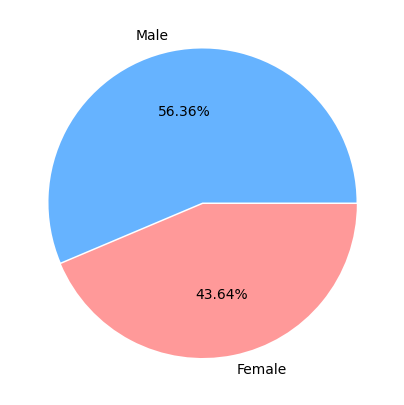

In [12]:
#plot of male and female who have heart attack
plt.figure(figsize=(5,5))
plt.pie(heart_attack['sex'].value_counts(),labels=['Male','Female'], autopct='%.2f%%',explode=(0,0.01),colors=['#66b3ff','#ff9999'])

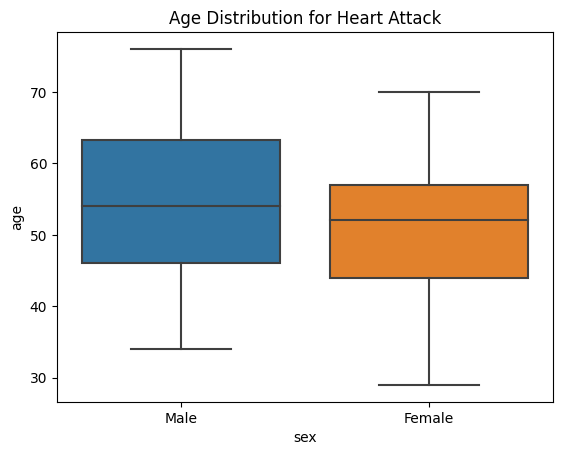

In [13]:
#box plot for age who had heart attack
sns.boxplot(x=heart_attack['sex'],y='age',data=df)
plt.title('Age Distribution for Heart Attack')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

<h4> seems like younger females are more likely to get heart attack </h4>

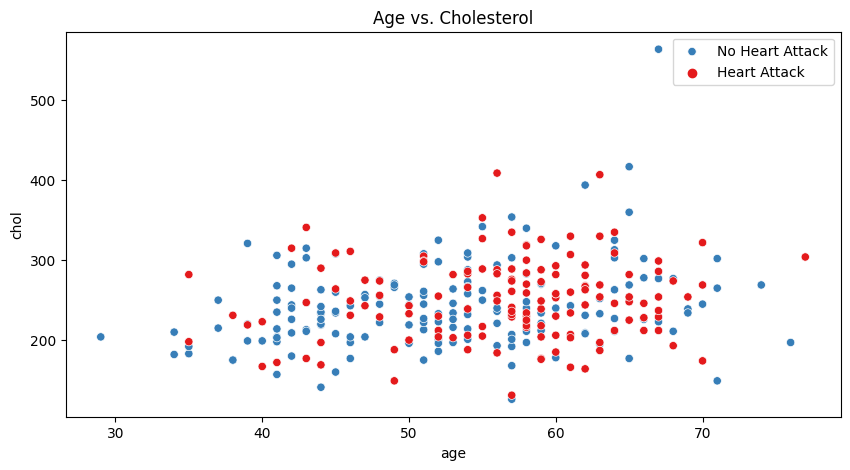

In [190]:
#Scatter Plots: Age vs. Cholesterol: Explore the relationship between age and serum cholesterol levels.
plt.figure(figsize=(10,5))
sns.scatterplot(x='age',y='chol',data=df,hue='output',palette='Set1')
plt.title('Age vs. Cholesterol')
plt.legend(['No Heart Attack','Heart Attack'])
plt.show()

<h4>The average cholesterol level for people who had a heart attack is higher than the average cholesterol level for people who did not have a heart attack.
There is a group of people with high cholesterol levels who did not have a heart attack. This suggests that there are other factors, in addition to cholesterol level, that contribute to the risk of heart attack.</h4>

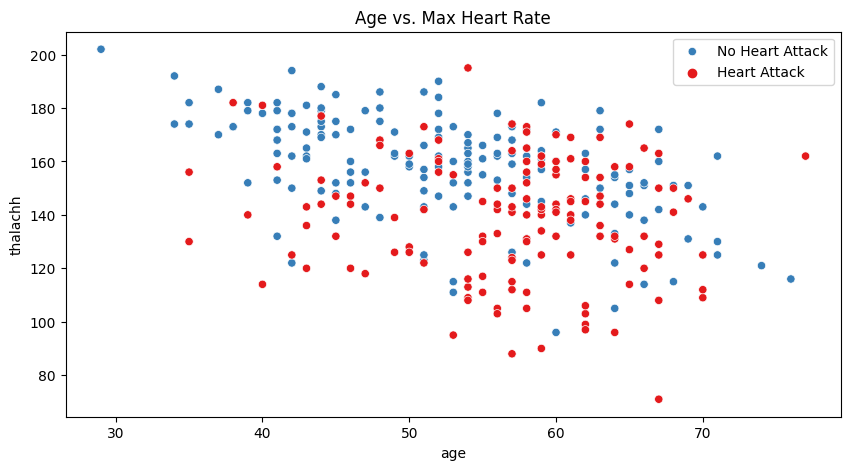

In [15]:
#Scatter Plots: Age vs. Max Heart Rate: Explore the relationship between age and maximum heart rate.
plt.figure(figsize=(10,5))
sns.scatterplot(x='age',y='thalachh',data=df,hue='output',palette='Set1')
plt.title('Age vs. Max Heart Rate')
plt.legend(['No Heart Attack','Heart Attack'])
plt.show()

<h4> We could observe two points, first having a heart attack lowers your heart rate, and second, the older you are, the lower your heart rate </h4>

## splitting data into train/test sets

In [16]:
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((203, 13), (100, 13))

# Random Forest Classifier
<h5> first we will start with the default number of trees which is 10
Then we will try to increase the number of trees to see if it will improve the accuracy or not </h5>

In [17]:
# initiate the classifier with n_estimators = 10 decision trees
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'.
       format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees: 0.8100


<h3> Visualizing the Results of our tree </h3>

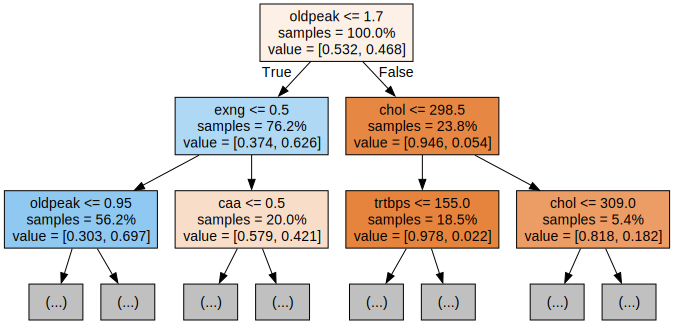

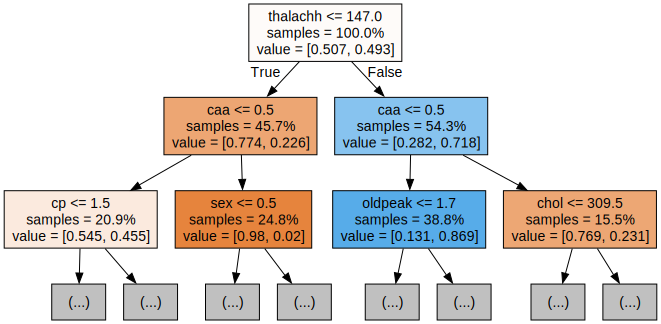

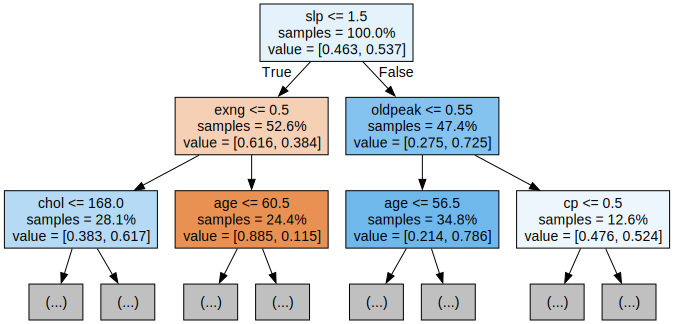

In [18]:
#We can use the following code to visualize our first three trees. 
for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [19]:
# initiate the classifier with n_estimators = 20 decision trees
rfc20 = RandomForestClassifier(n_estimators=20, random_state=0)

# train the model
rfc20.fit(X_train, y_train)

# predict the test set
y_pred_20 = rfc20.predict(X_test)

# evaluate the model performance
print('Model accuracy score with 20 decision-trees : {0:0.4f}'.
       format(accuracy_score(y_test, y_pred_20)))


Model accuracy score with 20 decision-trees : 0.8300


#### Random Forest Classifier with 50 trees

In [20]:
# initiate the classifier with n_estimators = 50 decision trees
rfc50 = RandomForestClassifier(random_state=50, n_estimators=50)

# fit the model
rfc50.fit(X_train, y_train)

# Predict the Test set results
y_pred_50 = rfc50.predict(X_test)

print('Model accuracy score with 50 decision-trees : {0:0.4f}'.
       format(accuracy_score(y_test, y_pred_50)))

Model accuracy score with 50 decision-trees: 0.8200


### because the accuracy decreased we won't be using 50 trees.
### After I tried with multiple trees I found that 25 is the best number of trees to use.

Random Forest Classifier with 25 trees

In [21]:
# initiate the classifier with n_estimators = 25 decision trees
rfc25 = RandomForestClassifier(n_estimators=25, random_state=0)

# train the model
rfc25.fit(X_train, y_train)

# predict the test set
rfc_y_pred_25 = rfc25.predict(X_test)

# evaluate the model performance
print('Model accuracy score with 25 decision-trees : {0:0.2f}'.
       format(accuracy_score(y_test, rfc_y_pred_25)))
print('Model precision score with 25 decision-trees : {0:0.2f}'.
       format(precision_score(y_test, rfc_y_pred_25)))
print('Model recall score with 25 decision-trees : {0:0.2f}'.
       format(recall_score(y_test, rfc_y_pred_25)))

Model accuracy score with 25 decision-trees: 0.84
Model precision score with 25 decision-trees: 0.86
Model recall score with 25 decision trees: 0.86


<h3> We will use Hyperparameter Tuning to find a better model to use if possible </h3>

In [22]:
param_dist = {'n_estimators': randint(10,300), 
              'max_depth': randint(1,30)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc, # The model to tune 
                                 param_distributions = param_dist, # The random grid to search
                                 n_iter=5, # The number of combinations to try  
                                 cv=5) # The number of folds to use for cross validation

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 1, 'n_estimators': 292}


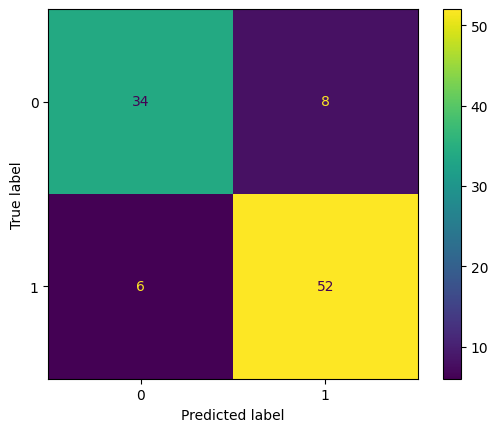

In [23]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:",round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))

Accuracy: 0.86
Precision: 0.87
Recall: 0.9


<h4> The hyperparameter did improve our model with hyperparameter {'max_depth': 1, 'n_estimators': 292}

<h4> In the previous model, we used all available features, we will try to use only the important features to see if the accuracy will improve or not </h4>

In [25]:
# view the feature scores
feature_scores = pd.Series(rfc25.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

oldpeak     0.129561
caa         0.111454
cp          0.109524
thalachh    0.093515
thall       0.093418
exng        0.091585
chol        0.087396
age         0.086522
trtbps      0.067955
slp         0.047436
sex         0.042111
restecg     0.025498
fbs         0.014026
dtype: float64

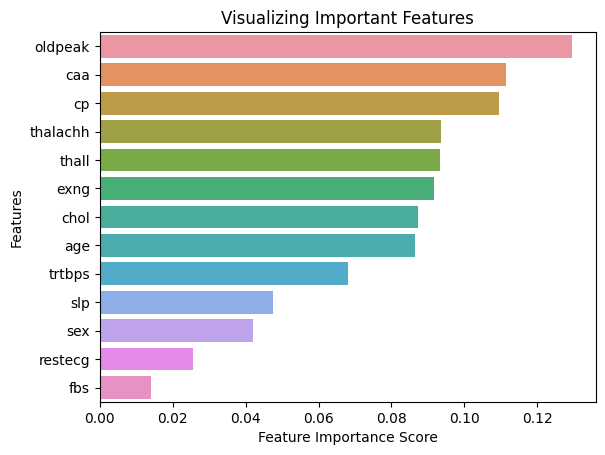

In [192]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [208]:
#feature selection
FS_X = df.drop(['output', 'fbs'], axis=1)
FS_y = df['output']

In [209]:
FS_X_train, FS_X_test, FS_y_train, FS_y_test = train_test_split(FS_X, FS_y, test_size = 0.33, random_state = 42)

In [211]:
# train the model
rfc25.fit(FS_X_train, y_train)

# predict the test set
FS_y_pred_25 = rfc25.predict(FS_X_test)

# evaluate the model performance
print('Model accuracy score with 25 decision-trees : {0:0.2f}'.
       format(accuracy_score(FS_y_test, FS_y_pred_25)))
print('Model precision score with 25 decision-trees : {0:0.2f}'.
       format(precision_score(FS_y_test, FS_y_pred_25)))
print('Model recall score with 25 decision-trees : {0:0.2f}'.
       format(recall_score(FS_y_test, FS_y_pred_25)))

Model accuracy score with 25 decision-trees: 0.80
Model precision score with 25 decision-trees: 0.84
Model recall score with 25 decision trees: 0.81


### unfortunately the accuracy didn't improve after I used only the important features. **note**: I tried to remove different features and the accuracy didn't improve.

### The random forest model has an accuracy of 0.86, which is a good accuracy, but we will try to improve it using other models

# KNN algorithm

<h4> *note* in each model I try diffrent n_neighbors till I find the best one </h4>

In [30]:
# split the data
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)

# instantiate the model, with default parameters
knn = KNeighborsClassifier()

# fit the model to the training set
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, knn_y_pred)))

Model accuracy score: 0.6600


In [31]:
# instantiate the model, k = 100 with the default metric
knn = KNeighborsClassifier(n_neighbors = 100)

# fit the model to the training set
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, knn_y_pred)))

Model accuracy score: 0.7200


In [32]:
# instantiate the model, k = 100 with the Manhattan metric
knn = KNeighborsClassifier(n_neighbors = 100, metric = 'manhattan')

# fit the model to the training set
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, knn_y_pred)))

Model accuracy score: 0.7700


In [33]:
# instantiate the model, k = 87 with the Jaccard metric
knn = KNeighborsClassifier(n_neighbors = 87, metric = 'jaccard')

# fit the model to the training set
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, knn_y_pred)))

Model accuracy score: 0.8400


In [34]:
# instantiate the model, k = 80 with the Canberra metric
knn = KNeighborsClassifier(n_neighbors = 80, metric = 'canberra')

# fit the model to the training set
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

# evaluate the model performance
print('KNN Model accuracy score: {0:0.2f}'.
       format(accuracy_score(y_test, knn_y_pred)))
print('KNN Model precision score: {0:0.2f}'.
       format(precision_score(y_test, knn_y_pred)))
print('KNN Model recall score: {0:0.2f}'.
       format(recall_score(y_test, knn_y_pred)))

KNN Model accuracy score: 0.89
KNN Model precision score: 0.89
KNN Model recall score: 0.93


<h4> We could see that KNN is better than random forest but could a hyperparameter tuning improve the accuracy of KNN? </h4>

In [176]:
'''
param_dist = {'n_neighbors': randint(10,100), 
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'jaccard', 'canberra', 'braycurtis', 'mahalanobis', 
                         'wminkowski', 'seuclidean', 'cosine', 'correlation', 'haversine']}


# instantiate the model, with default parameters
knn = KNeighborsClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(knn, # The model to tune 
                                 param_distributions = param_dist, # The random grid to search
                                 n_iter=5, # The number of combinations to try  
                                 cv=5) # The number of folds to use for cross validation

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print("Accuracy:",round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
'''

Best hyperparameters: {'metric': 'canberra', 'n_neighbors': 72, 'weights': 'distance'}
Accuracy: 0.89
Precision: 0.89
Recall: 0.93


<h4> Since we are using RandomizedSearchCV we will get different results each time we run the code, one of the best results I got, is the following: 
Best hyperparameters: {'metric': 'canberra', 'n_neighbors': 72, 'weights': 'distance'}</h4>
Accuracy: 0.89
Precision: 0.89
Recall: 0.93

<h4> The accuracy stayed the same after hyperparameter tuning but could we improve it even more by feature engineering? </h4>

In [36]:
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 78, metric = 'canberra', weights = 'distance')

# Fit the model to the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
knn_y_pred = knn.predict(X_test_scaled)

# evaluate the model performance
print('KNN Model accuracy score with scaled features: {0:0.2f}'.format(accuracy_score(y_test, knn_y_pred)))
print('KNN Model precision score: {0:0.2f}'.
       format(precision_score(y_test, knn_y_pred)))
print('KNN Model recall score: {0:0.2f}'.
       format(recall_score(y_test, knn_y_pred)))

KNN Model accuracy score with scaled features: 0.86
KNN Model precision score: 0.87
KNN Model recall score: 0.90


<h3> unfortunately the accuracy didn't improve after feature engineering so we will stick with either our original model or hyperparameter model </h3>

<h2> Naive Bayes </h2>

In [37]:
# split the data
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)

# instantiate the model, with default parameters
nb = GaussianNB()

# fit the model to the training set
nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)

# evaluate the model performance
print('Naive Bayes Model accuracy score: {0:0.2f}'.
         format(accuracy_score(y_test, nb_y_pred)))



Naive Bayes Model accuracy score: 0.83


<h4> will hyperparameter tuning improve the accuracy of Naive Bayes? </h4>

In [181]:
# Define the hyperparameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_nb = grid_search.best_estimator_
best_nb_y_pred = best_nb.predict(X_test)
print('Best Naive Bayes Model accuracy score: {0:0.2f}'.
         format(accuracy_score(y_test, best_nb_y_pred)))

Best hyperparameters: {'var_smoothing': 1e-09}
Best Naive Bayes Model accuracy score: 0.83


<h4> unfortunately the accuracy didn't improve after hyperparameter tuning but what about Feature Engineering? </h4>

In [186]:
# Create polynomial features (interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Instantiate and train the model with the polynomial features
nb_poly = GaussianNB()
nb_poly.fit(X_train_poly, y_train)

nb_poly_y_pred = nb_poly.predict(X_test_poly)

# Evaluate the model performance with polynomial features
print('Naive Bayes Model with Polynomial Features accuracy score: {0:0.2f}'.
         format(accuracy_score(y_test, nb_poly_y_pred)))
print('Naive Bayes Model with Polynomial Features precision score: {0:0.2f}'.
            format(precision_score(y_test, nb_poly_y_pred)))
print('Naive Bayes Model with Polynomial Features recall score: {0:0.2f}'.
            format(recall_score(y_test, nb_poly_y_pred)))

Naive Bayes Model with Polynomial Features accuracy score: 0.85
Naive Bayes Model with Polynomial Features precision score: 0.89
Naive Bayes Model with Polynomial Features recall score: 0.84


<h3> it did, feature engineering improved the of Naive Bayes </h3>

<h2> Support Vector machine (SVM) </h2>

In [187]:
# Instantiate an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("SVM Accuracy:", round(accuracy, 2))
print("SVM Precision:", round(precision, 2))
print("SVM Recall:", round(recall, 2))

SVM Accuracy: 0.83
SVM Precision: 0.83
SVM Recall: 0.83


<h4> hyperparameter tuning  </h4>

<h5> the code below took me 45 minutes to run, and it did not improve the accuracy  
So I will comment it to avoid running it again</h5>

In [41]:
""""
# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Valid kernel options
    'gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf'
}

# Instantiate an SVM classifier
svm_classifier = SVC(random_state=42)

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))

"""

'"\n# Define the hyperparameter grid for grid search\nparam_grid = {\n    \'C\': [0.1, 1, 10],             # Regularization parameter\n    \'kernel\': [\'linear\', \'rbf\', \'poly\', \'sigmoid\'],  # Valid kernel options\n    \'gamma\': [\'scale\', \'auto\'],    # Kernel coefficient for \'rbf\'\n}\n\n# Instantiate an SVM classifier\nsvm_classifier = SVC(random_state=42)\n\n# Create a grid search object with cross-validation\ngrid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)\n\n# Fit the grid search to the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best hyperparameters:", grid_search.best_params_)\n\n# Evaluate the best model on the test set\nbest_svm = grid_search.best_estimator_\ny_pred = best_svm.predict(X_test)\n\naccuracy = accuracy_score(y_test, y_pred)\nprecision = precision_score(y_test, y_pred, average=\'weighted\')\nrecall = recall_score(y_test, y_pred, average=\'weighted\')\n\nprint("Accur

*note* the output of the code above is the following 

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.82
Precision: 0.82
Recall: 0.82

<h4> feature engineering </h4>

In [188]:
# Instantiate an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train) #we did X_train_scaled for naive bayes, we will just reuse it
# Predict on the scaled test data
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.82


<h5> Unfortunately the accuracy didn't improve after either hyperparameter tuning nor feature engineering so we will stick with the default values </h5>

# Conclusion

<h4> we could see that KNN is the best model to use with an accuracy of 0.89 </h4>

<h4> and that feature engineering improved the accuracy of Naive Bayes </h4>

<h4> We could also see that hyperparameter tuning improved the accuracy of Random Forest Classifier </h4>